<a href="https://www.kaggle.com/code/lalit7881/top-500-ai-tools-in-2026-99-accuracy?scriptVersionId=300563338" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-100-ai-tools-2026/top_100_ai_tools_2026.json
/kaggle/input/top-100-ai-tools-2026/top100_ai_tools_2026.csv


In [2]:
df = pd.read_csv("/kaggle/input/top-100-ai-tools-2026/top100_ai_tools_2026.csv")

In [3]:
df.head()

,Rank,Tool_Name,Primary_Category,Sub_Category,Pricing_Model,Starting_Price_USD,Monthly_Traffic_Est,User_Rating,Agentic_Capability_Score,API_Available,Release_Year,Active_Users_Est,Description
0,1,ChatGPT,Conversational AI,General Assistant,Freemium,20.00,1800000000,4.8,9.5,Yes,2022,180000000,"OpenAI's flagship conversational AI for text, ..."
1,2,Gemini,Conversational AI,Multimodal AI,Freemium,19.99,500000000,4.7,9.3,Yes,2023,90000000,Google's multimodal AI integrated with Google ...
2,3,Canva AI,Image Generation,Design Assistant,Freemium,15.00,500000000,4.6,6.0,Yes,2023,170000000,AI design tools integrated in Canva
3,4,Character.AI,Conversational AI,Roleplay & Chat,Freemium,9.99,300000000,4.3,6.0,No,2022,20000000,AI characters for entertainment and roleplay
4,5,Claude,Conversational AI,General Assistant,Freemium,20.00,200000000,4.8,9.4,Yes,2023,50000000,Anthropic's safety-focused AI assistant with l...


In [4]:
df.tail()

,Rank,Tool_Name,Primary_Category,Sub_Category,Pricing_Model,Starting_Price_USD,Monthly_Traffic_Est,User_Rating,Agentic_Capability_Score,API_Available,Release_Year,Active_Users_Est,Description
495,496,Koral Bot,Research & Search,Market Research,Paid,196.25,114463,4.10,6.08,No,2023,38201,AI research assistant for faster knowledge dis...
496,497,Quill Flow,HR & Recruiting,Employee Onboarding,Paid,71.45,101182,4.18,7.39,Yes,2023,3464,AI recruitment and HR automation platform
497,498,Cipher GPT,Legal AI,Legal Research,Paid,414.84,88779,4.38,7.20,Yes,2023,18600,"AI platform for legal research, drafting, and ..."
498,499,Quill GPT,HR & Recruiting,Employee Onboarding,Paid,84.36,80270,4.22,7.35,Yes,2021,14974,AI recruitment and HR automation platform
499,500,Cipher Flow,Cybersecurity AI,Threat Detection,Paid,0.00,65878,4.45,8.25,Yes,2021,8912,AI-powered cybersecurity and threat intelligen...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rank                      500 non-null    int64  
 1   Tool_Name                 500 non-null    object 
 2   Primary_Category          500 non-null    object 
 3   Sub_Category              500 non-null    object 
 4   Pricing_Model             500 non-null    object 
 5   Starting_Price_USD        500 non-null    float64
 6   Monthly_Traffic_Est       500 non-null    int64  
 7   User_Rating               500 non-null    float64
 8   Agentic_Capability_Score  500 non-null    float64
 9   API_Available             500 non-null    object 
 10  Release_Year              500 non-null    int64  
 11  Active_Users_Est          500 non-null    int64  
 12  Description               500 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 50.9+ KB


In [6]:
df.describe()

,Rank,Starting_Price_USD,Monthly_Traffic_Est,User_Rating,Agentic_Capability_Score,Release_Year,Active_Users_Est
count,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02
mean,250.500000,61.616940,1.189889e+07,4.285060,6.610580,2022.138000,1.948661e+06
std,144.481833,94.884544,8.868521e+07,0.171419,1.494926,2.463146,1.246835e+07
min,1.000000,0.000000,6.587800e+04,3.800000,2.000000,2009.000000,3.510000e+02
25%,125.750000,12.000000,6.152182e+05,4.157500,5.600000,2021.000000,3.296050e+04
50%,250.500000,24.000000,1.148314e+06,4.290000,6.630000,2023.000000,8.589150e+04
75%,375.250000,71.572500,3.000000e+06,4.400000,7.610000,2024.000000,2.620055e+05
max,500.000000,1000.000000,1.800000e+09,4.800000,9.940000,2025.000000,1.800000e+08


In [7]:
df.isnull().sum()

Rank                        0
Tool_Name                   0
Primary_Category            0
Sub_Category                0
Pricing_Model               0
Starting_Price_USD          0
Monthly_Traffic_Est         0
User_Rating                 0
Agentic_Capability_Score    0
API_Available               0
Release_Year                0
Active_Users_Est            0
Description                 0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

Rank                          int64
Tool_Name                    object
Primary_Category             object
Sub_Category                 object
Pricing_Model                object
Starting_Price_USD          float64
Monthly_Traffic_Est           int64
User_Rating                 float64
Agentic_Capability_Score    float64
API_Available                object
Release_Year                  int64
Active_Users_Est              int64
Description                  object
dtype: object

In [10]:
df.shape

(500, 13)

In [11]:
df.nunique()

Rank                        500
Tool_Name                   500
Primary_Category             22
Sub_Category                162
Pricing_Model                 5
Starting_Price_USD          356
Monthly_Traffic_Est         355
User_Rating                  70
Agentic_Capability_Score    262
API_Available                 2
Release_Year                 15
Active_Users_Est            370
Description                 185
dtype: int64

In [12]:
df.columns

Index(['Rank', 'Tool_Name', 'Primary_Category', 'Sub_Category',
       'Pricing_Model', 'Starting_Price_USD', 'Monthly_Traffic_Est',
       'User_Rating', 'Agentic_Capability_Score', 'API_Available',
       'Release_Year', 'Active_Users_Est', 'Description'],
      dtype='object')

## EDA

In [13]:
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())

Shape of dataset: (500, 13)

Data Types:
 Rank                          int64
Tool_Name                    object
Primary_Category             object
Sub_Category                 object
Pricing_Model                object
Starting_Price_USD          float64
Monthly_Traffic_Est           int64
User_Rating                 float64
Agentic_Capability_Score    float64
API_Available                object
Release_Year                  int64
Active_Users_Est              int64
Description                  object
dtype: object

Missing Values:
 Rank                        0
Tool_Name                   0
Primary_Category            0
Sub_Category                0
Pricing_Model               0
Starting_Price_USD          0
Monthly_Traffic_Est         0
User_Rating                 0
Agentic_Capability_Score    0
API_Available               0
Release_Year                0
Active_Users_Est            0
Description                 0
dtype: int64

Statistical Summary:
              Rank  Starting_Pric

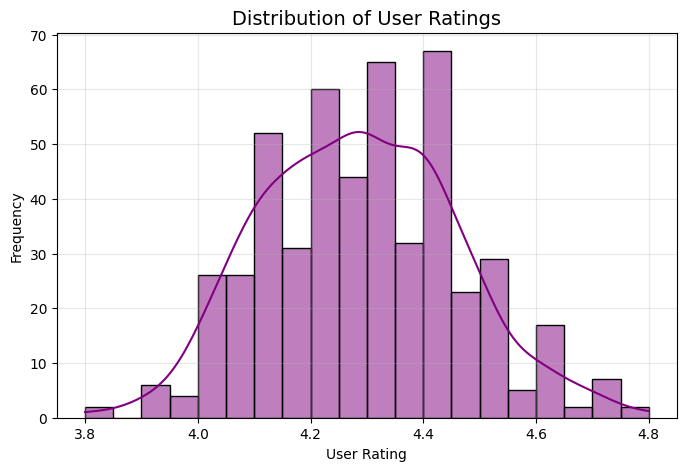

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['User_Rating'], bins=20, kde=True, color='purple')
plt.title("Distribution of User Ratings", fontsize=14)
plt.xlabel("User Rating")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

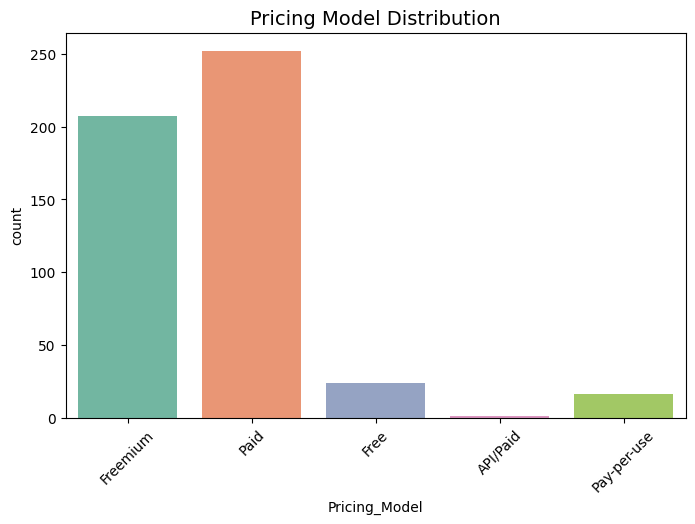

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='Pricing_Model', data=df, palette='Set2')
plt.title("Pricing Model Distribution", fontsize=14)
plt.xticks(rotation=45)
plt.show()

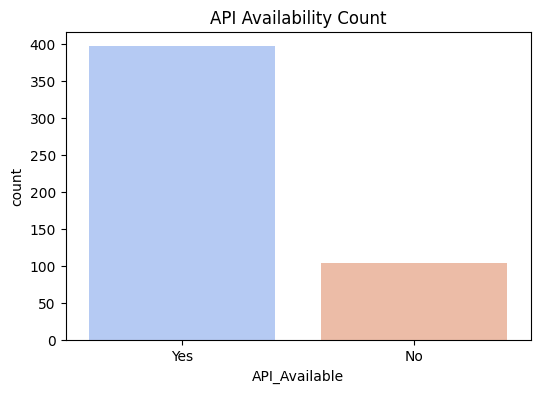

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='API_Available', data=df, palette='coolwarm')
plt.title("API Availability Count")
plt.show()

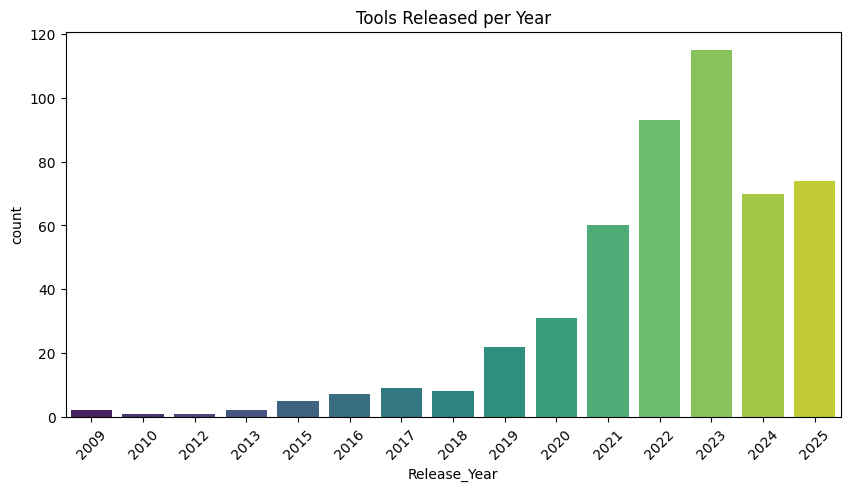

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='Release_Year', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title("Tools Released per Year")
plt.show()

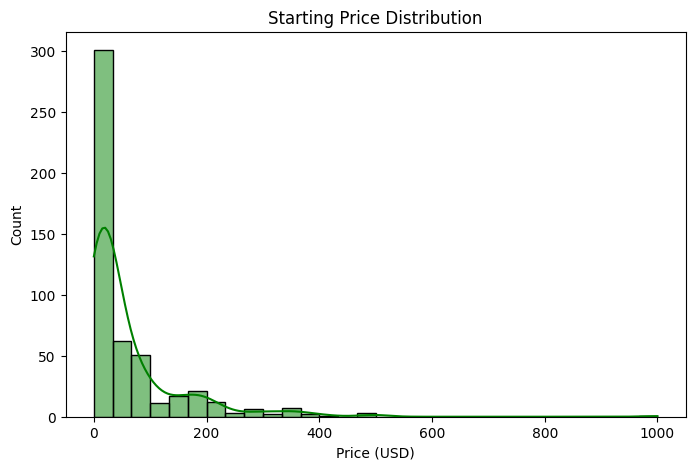

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['Starting_Price_USD'], bins=30, color='green', kde=True)
plt.title("Starting Price Distribution")
plt.xlabel("Price (USD)")
plt.show()

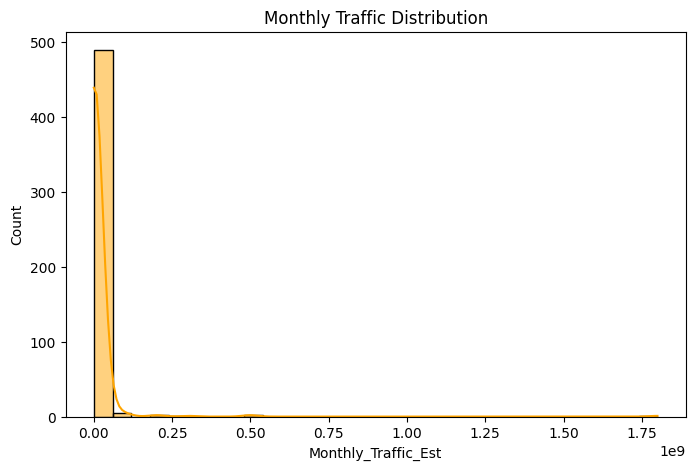

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['Monthly_Traffic_Est'], bins=30, color='orange', kde=True)
plt.title("Monthly Traffic Distribution")
plt.show()

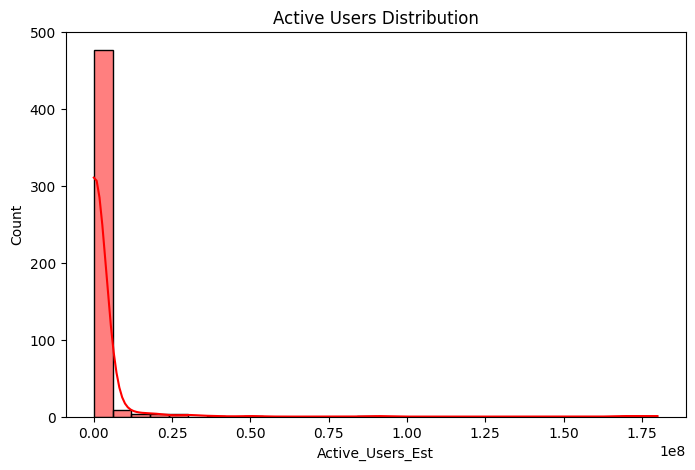

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['Active_Users_Est'], bins=30, color='red', kde=True)
plt.title("Active Users Distribution")
plt.show()

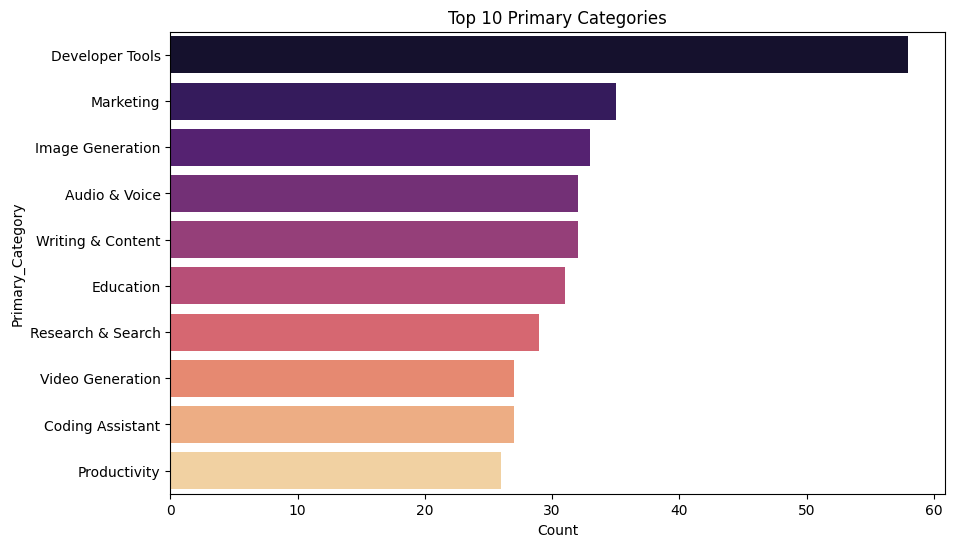

In [21]:
top_categories = df['Primary_Category'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.values,
            y=top_categories.index,
            palette='magma')

plt.title("Top 10 Primary Categories")
plt.xlabel("Count")
plt.show()

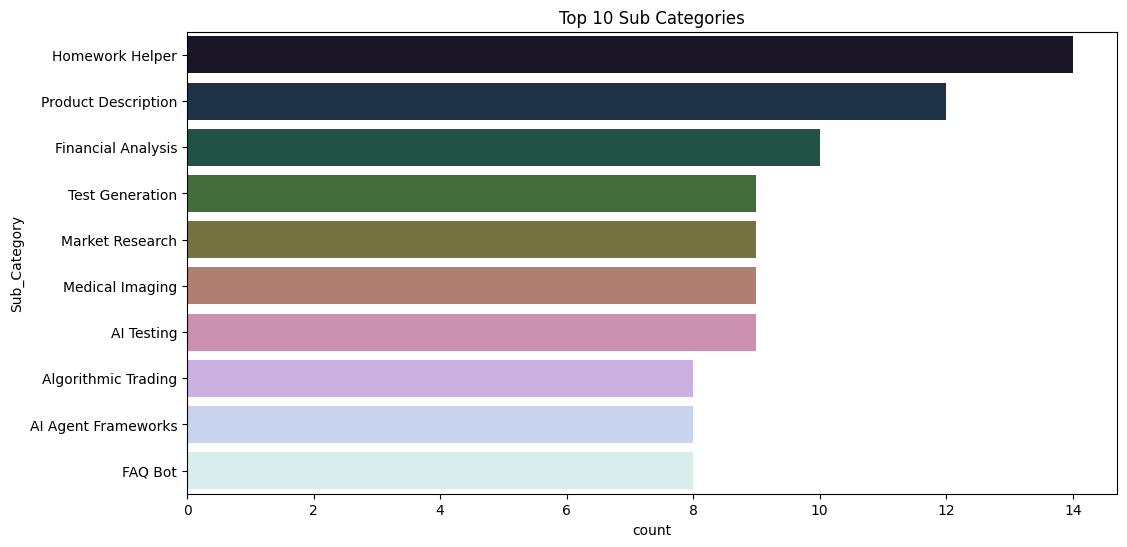

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(y='Sub_Category', data=df,
              order=df['Sub_Category'].value_counts().index[:10],
              palette='cubehelix')

plt.title("Top 10 Sub Categories")
plt.show()

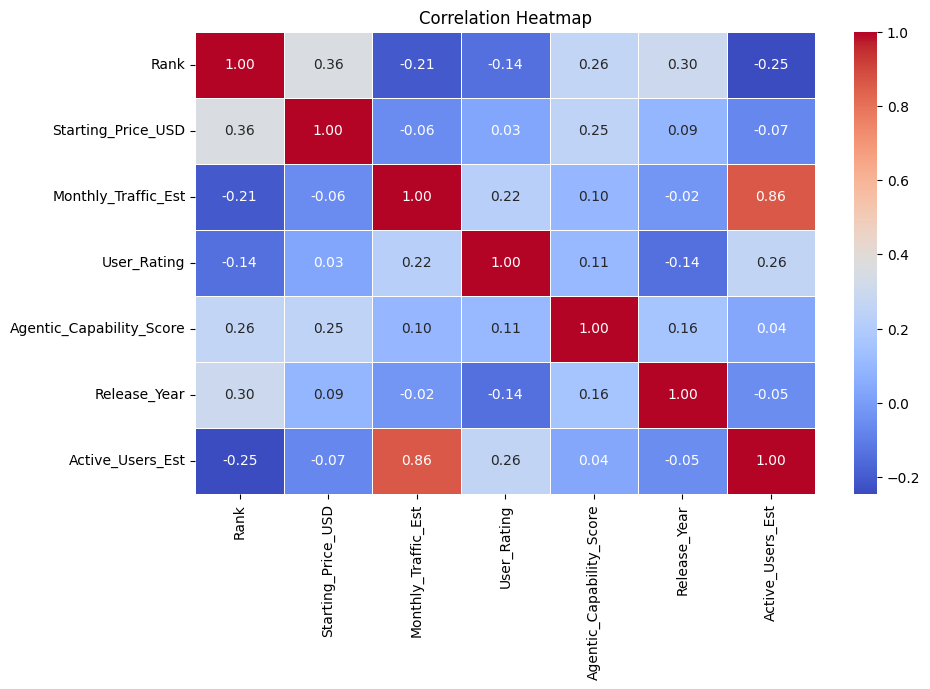

In [23]:
plt.figure(figsize=(10,6))

numeric_cols = df.select_dtypes(include=np.number)

sns.heatmap(numeric_cols.corr(),
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

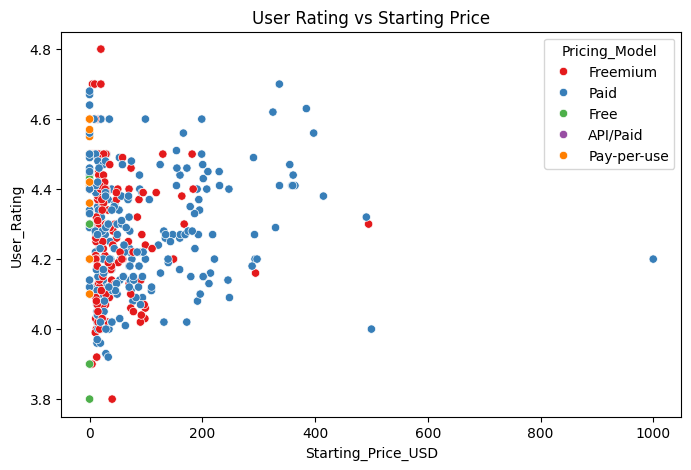

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Starting_Price_USD',
                y='User_Rating',
                hue='Pricing_Model',
                data=df,
                palette='Set1')

plt.title("User Rating vs Starting Price")
plt.show()

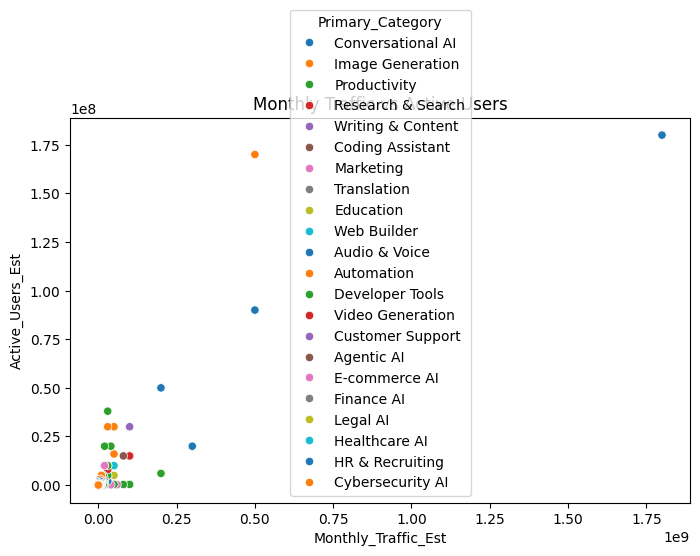

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Monthly_Traffic_Est',
                y='Active_Users_Est',
                hue='Primary_Category',
                data=df,
                palette='tab10')

plt.title("Monthly Traffic vs Active Users")
plt.show()

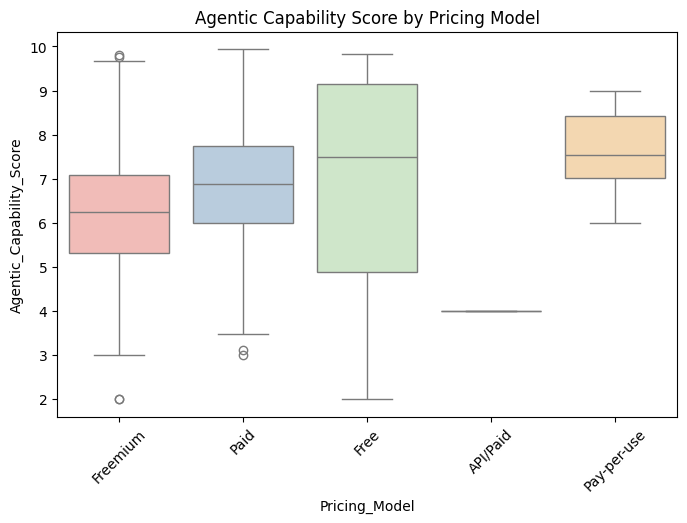

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Pricing_Model',
            y='Agentic_Capability_Score',
            data=df,
            palette='Pastel1')

plt.xticks(rotation=45)
plt.title("Agentic Capability Score by Pricing Model")
plt.show()

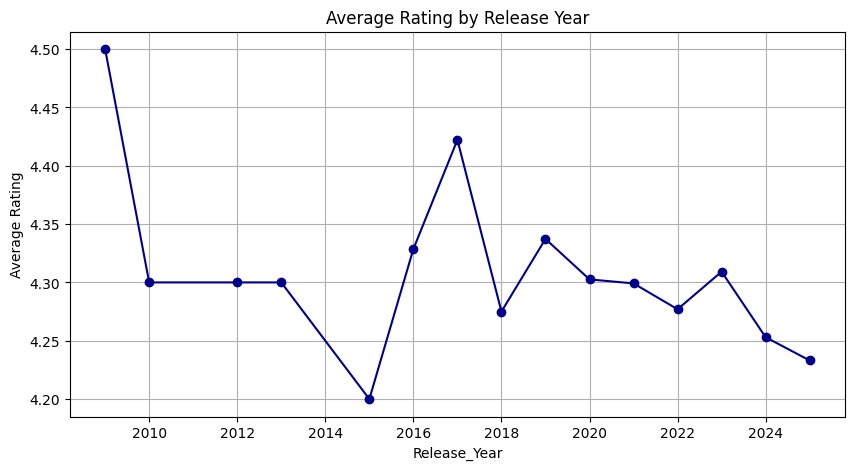

In [27]:
year_rating = df.groupby('Release_Year')['User_Rating'].mean()

plt.figure(figsize=(10,5))
year_rating.plot(kind='line', marker='o', color='darkblue')
plt.title("Average Rating by Release Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

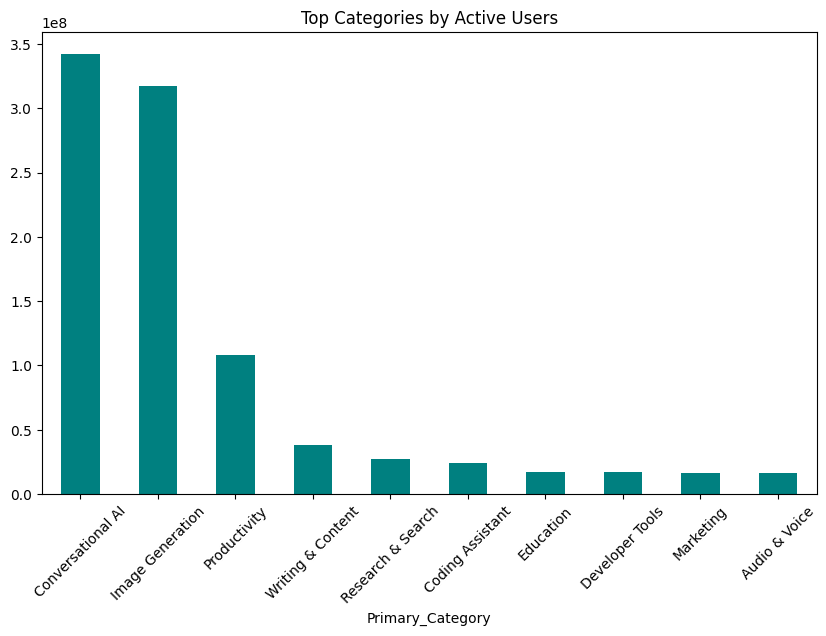

In [28]:
users_category = df.groupby('Primary_Category')['Active_Users_Est'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
users_category.plot(kind='bar', color='teal')
plt.title("Top Categories by Active Users")
plt.xticks(rotation=45)
plt.show()

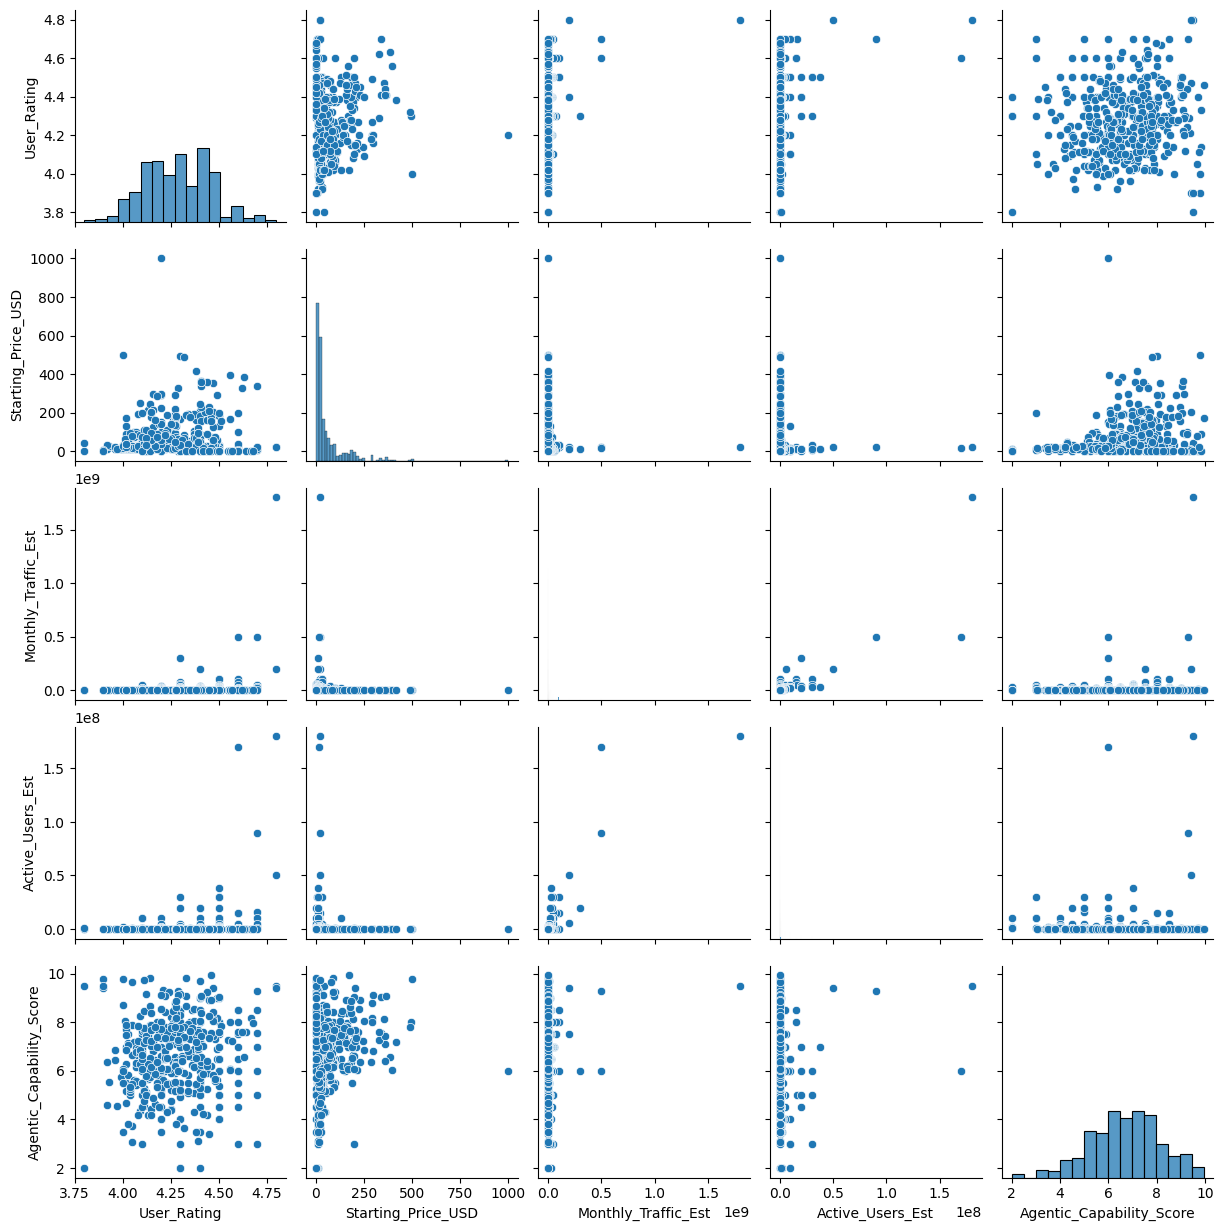

In [29]:
sns.pairplot(df[['User_Rating',
                 'Starting_Price_USD',
                 'Monthly_Traffic_Est',
                 'Active_Users_Est',
                 'Agentic_Capability_Score']],
             palette='husl')

plt.show()

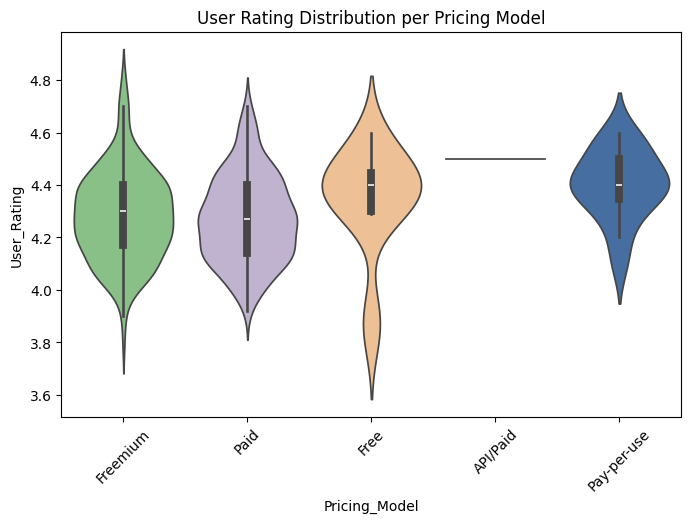

In [30]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Pricing_Model',
               y='User_Rating',
               data=df,
               palette='Accent')

plt.xticks(rotation=45)
plt.title("User Rating Distribution per Pricing Model")
plt.show()

## Feature engineering

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [32]:
df['High_Performance'] = np.where(
    (df['User_Rating'] >= 4.2) &
    (df['Active_Users_Est'] >= df['Active_Users_Est'].median()),
    1, 0
)

In [33]:
df_model = df.drop(['Rank', 'Tool_Name', 'Description'], axis=1)

X = df_model.drop('High_Performance', axis=1)
y = df_model['High_Performance']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify feature types
numeric_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features = X.select_dtypes(include=['object','bool']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [35]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

smote = SMOTE(random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

In [37]:
pipelines = {}

for name, model in models.items():
    pipelines[name] = ImbPipeline(steps=[
        ('preprocessing', preprocessor),
        ('smote', smote),
        ('classifier', model)
    ])

In [38]:
from sklearn.model_selection import cross_val_score

for name, pipe in pipelines.items():
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"{name} ROC-AUC: {scores.mean():.4f}")

Logistic Regression ROC-AUC: 0.9003
Decision Tree ROC-AUC: 0.9964
Random Forest ROC-AUC: 0.9970
Gradient Boosting ROC-AUC: 0.9964
SVM ROC-AUC: 0.8983
KNN ROC-AUC: 0.8330
XGBoost ROC-AUC: 0.9949


In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20]
}

grid = GridSearchCV(
    pipelines['Random Forest'],
    param_grid,
    cv=5,
    scoring='roc_auc'
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 200}


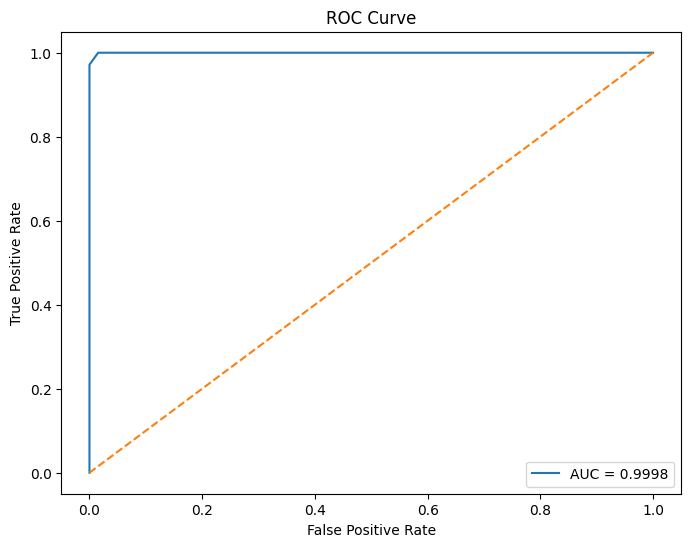

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
best_model.fit(X_train, y_train)

y_prob = best_model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

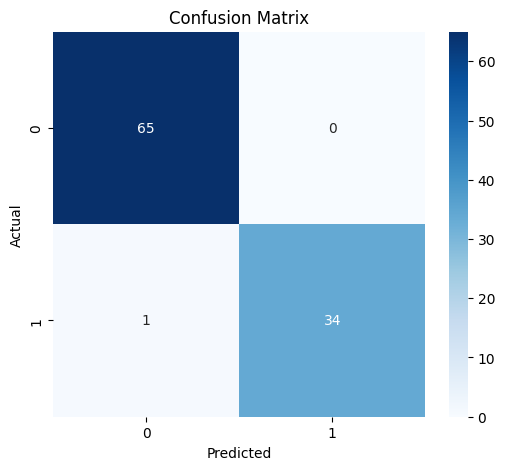

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        65
           1       1.00      0.97      0.99        35

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

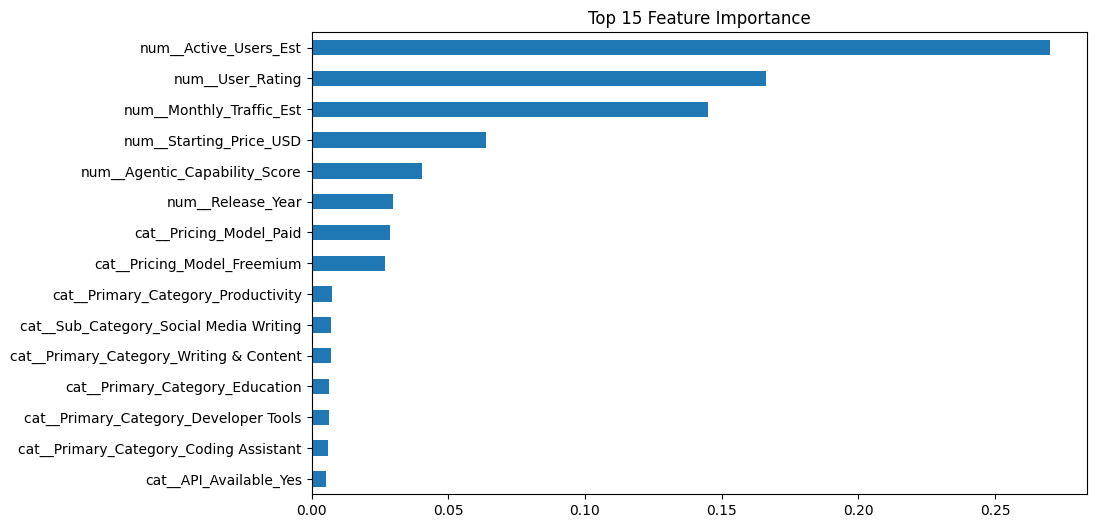

In [42]:
feature_names = best_model.named_steps['preprocessing'].get_feature_names_out()
importances = best_model.named_steps['classifier'].feature_importances_

importance_df = pd.Series(importances, index=feature_names)
top_features = importance_df.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
top_features.plot(kind='barh')
plt.title("Top 15 Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [43]:
def predict_tool(input_data):
    input_df = pd.DataFrame([input_data])
    prediction = best_model.predict(input_df)[0]
    probability = best_model.predict_proba(input_df)[0][1]
    
    return {
        "Prediction": "High Performing" if prediction == 1 else "Low Performing",
        "Confidence (%)": round(probability * 100, 2)
    }

## Thank you..pls upvote!!1